In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from IPython.display import HTML

In [4]:
#making dataset
dict = {
    'cgp' :[7,9,8,7.7,5.9,6,6.8,9.1,8.7,8.5],
    'study_hrs' :[3,6,5.5,4,2,3,3.5,6.5,5,4.9],
    'placed':[0,1,1,0,0,1,0,1,1,0]
}

In [5]:
#convert to dataframe
data = pd.DataFrame(dict)
data

,cgp,study_hrs,placed
0,7.0,3.0,0
1,9.0,6.0,1
2,8.0,5.5,1
3,7.7,4.0,0
4,5.9,2.0,0
5,6.0,3.0,1
6,6.8,3.5,0
7,9.1,6.5,1
8,8.7,5.0,1
9,8.5,4.9,0


In [6]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

y

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

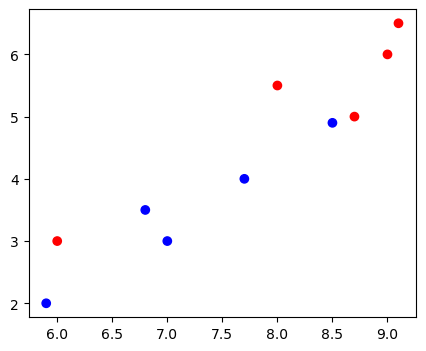

In [7]:
#visualize the distribution
plt.figure(figsize =(5,4))
plt.scatter(X[:,0],X[:,1],c= y,cmap ='bwr')
plt.show()

In [8]:
#step function
def step(z):
    return 1 if z > 0 else 0

In [9]:
#percetpron
def perceptron(X,y,epochs,lr):
    X = np.insert(X,0,1,axis =1)  #add bias 
    weights = np.ones(X.shape[1])  #weights equals to number of columns 
    np_samples = X.shape[0]
    weight_history = [weights.copy()]  #copy the initial weights 

    for i in range(epochs):
        j = np.random.randint(0,np_samples)  #select random points from X
        y_hat = step(np.dot(weights,X[j]))
        weights += lr* (y[j]-y_hat) *X[j]
        weight_history.append(weights.copy()) #copy each change in weight
    return weight_history
        

In [10]:
weight_history = perceptron(X,y,500,0.1 )

Text(0, 0.5, 'study_hours ---->')

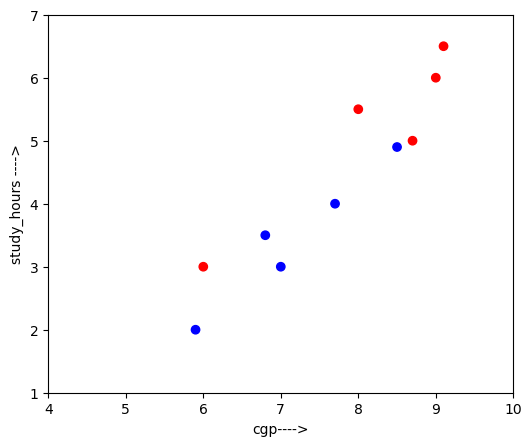

In [11]:
#plot setup
fig, ax = plt.subplots(figsize= (6,6))
plt.subplots_adjust(bottom =0.25)
ax.scatter(X[:,0],X[:,1],c= y ,cmap ='bwr')
line, = ax.plot([],[], 'k-',lw =3)
ax.set_xlim(X[:,0].min().astype(int)-1,X[:,0].max().astype(int)+1)
ax.set_ylim(X[:,1].min().astype(int)-1,X[:,1].max().astype(int)+1)
ax.set_xlabel("cgp---->")
ax.set_ylabel("study_hours ---->")



In [12]:
#annotation for showing weights on screen
text = ax.text(
    0.05, -0.18, '',
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox={'facecolor': 'yellow', 'alpha': 0.8}
)

#function to update animation 
def update(frame):
    w = weight_history[frame]
    bias,w1,w2 = w[0],w[1],w[2]
    x1_vals = np.linspace(X[:,0].min()-1,X[:,0].max()+1,10)
    x2_vals = -(bias + w1 * x1_vals)/ (w2 +1e-6) #avoid division by 0
    line.set_data(x1_vals,x2_vals)
    text.set_text(f"Epoch {frame + 1} | Bias = {bias:.2f},w1 ={w1:.2f},w2= {w2:.2f}")
    return line,text

In [13]:
#create animation 
ani = FuncAnimation(fig, update, frames = len(weight_history),interval= 200 ,blit = True)
#convert to html for display in notebook
HTML(ani.to_html5_video())

In [16]:
ani.save('perceptron_animation.mp4',writer='ffmpeg',fps=30)